In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
sns.set_context('poster')

In [2]:
file='data/rucio_transfer-events-2017.08.06.csv'
data = pd.read_csv(file)
data = data.drop('Unnamed: 0', axis=1)
# data=data.set_index(['submitted_at'])
print(data.head(5), '\n --------------------- \n')
data.info()

          submitted_at      bytes   delay        activity  \
0  2017-07-30 09:17:20  122408123  575780  Data Brokering   
1  2017-07-30 09:17:20  135263354  576506  Data Brokering   
2  2017-07-30 09:17:20  124532770  573012  Data Brokering   
3  2017-07-30 09:17:20  116879660  576749  Data Brokering   
4  2017-07-30 09:17:20  120500070  576590  Data Brokering   

                            dst-rse dst-type protocol  \
0  CA-VICTORIA-WESTGRID-T2_DATADISK     DISK      srm   
1  CA-VICTORIA-WESTGRID-T2_DATADISK     DISK      srm   
2  CA-VICTORIA-WESTGRID-T2_DATADISK     DISK      srm   
3  CA-VICTORIA-WESTGRID-T2_DATADISK     DISK      srm   
4  CA-VICTORIA-WESTGRID-T2_DATADISK     DISK      srm   

                        src-rse src-type                 transfer-endpoint  \
0  CA-MCGILL-CLUMEQ-T2_DATADISK     DISK  https://fts.usatlas.bnl.gov:8446   
1  CA-MCGILL-CLUMEQ-T2_DATADISK     DISK  https://fts.usatlas.bnl.gov:8446   
2  CA-MCGILL-CLUMEQ-T2_DATADISK     DISK  https://fts.us

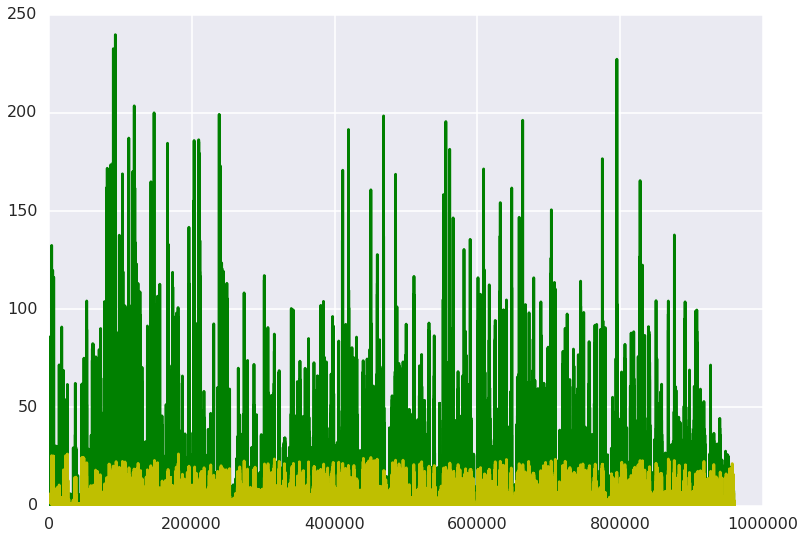

In [3]:
plt.plot(data['duration'] / 60, 'g')
plt.plot(data['prediction']/ 60, 'y')
# data['duration'].plot()
# data['prediction'].plot()
plt.show()

(959439,)
(959439, 1)


/cvmfs/sft.cern.ch/lcg/releases/numpy/1.11.0-43867/x86_64-slc6-gcc62-opt/lib/python3.5/site-packages/numpy-1.11.0-py3.5-linux-x86_64.egg/numpy/core/fromnumeric.py:225: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return reshape(newshape, order=order)


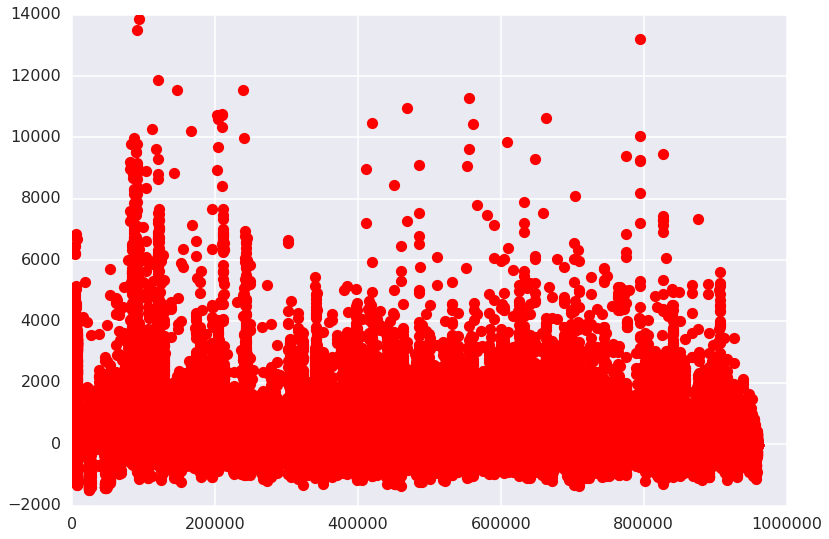

In [4]:
errors= data['duration'] - data['prediction']
print(errors.shape)
errors=np.reshape(errors, [errors.shape[0],1])
print(errors.shape)
plt.plot(errors, 'or')

plt.show()

231.138602702


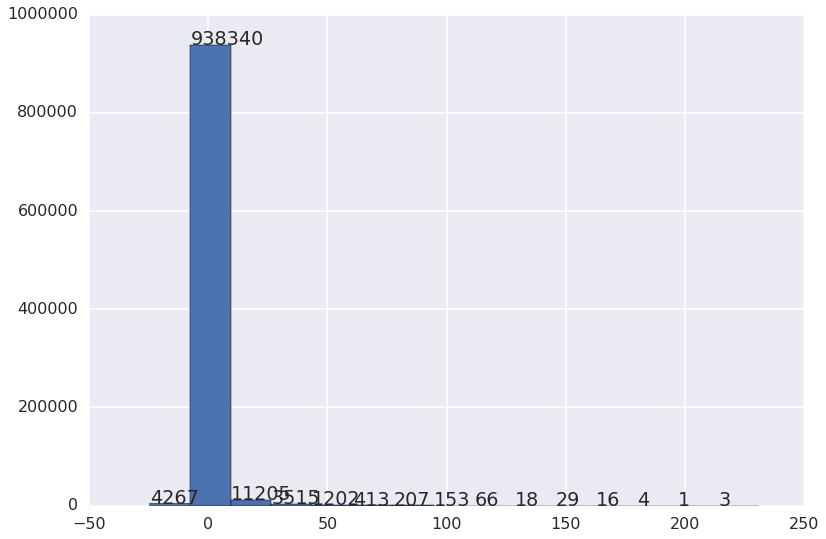

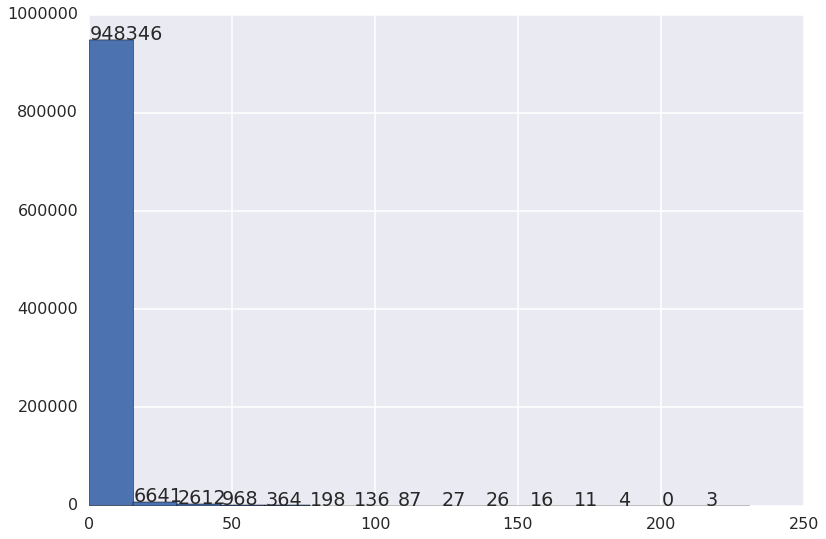

total values with error less than 1 minutes : 786547  percentage :81.97988616264296 %
total values with error less than 2 minutes : 833907  percentage :86.91610409833245 %
total values with error less than 3 minutes : 866016  percentage :90.26274729294931 %
total values with error less than 5 minutes : 909586  percentage :94.80394272069407 %
total values with error less than 10 minutes : 941233  percentage :98.10243277582003 %
total values with error less than 30 minutes : 954773  percentage :99.51367413665693 %
total values with error more than an hour : 940  percentage :0.09797392017626967 %
max error :231.13860270182292  minutes


In [5]:
errs = errors/60
print(np.max(errs))

bins=15
# bins=[-20,-15,-10,-5,0,5,10,15,20,25,30,35,40,45,50,55,60]
arr= plt.hist(errs, bins=bins)
for i in range(bins):
    plt.text(arr[1][i],arr[0][i],str(int(arr[0][i])))
plt.show()

arr2 = plt.hist(np.absolute(errs), bins=bins)
for i in range(bins):
    plt.text(arr2[1][i],arr2[0][i],str(int(arr2[0][i])))
plt.show()


i_1=0
i_2=0
i_3 = 0
i_4 = 0
i_5 = 0
i_10 = 0
i_20 = 0
i_30=0
i_40 =0
i_50 = 0
i_60=0
j=0
for err in errors:
    if np.absolute(err/ 60)<=1:
        i+=1
    if np.absolute(err/ 60)<=2:
        i_2+=1
    if np.absolute(err/ 60)<=3:
        i_3+=1
    if np.absolute(err/ 60)<=4:
        i_4+=1
    if np.absolute(err/ 60)<=5:
        i_5+=1
    if np.absolute(err/ 60)<=10:
        i_10+=1
    if np.absolute(err/ 60)<=20:
        i_20+=1
    if np.absolute(err/ 60)<=30:
        i_30+=1
    if np.absolute(err/ 60)<=40:
        i_40+=1
    if np.absolute(err/ 60)<=50:
        i_50+=1
    if np.absolute(err/ 60)<=60:
        i_60+=1
    else:
        j+=1
print('total values with error less than 1 minutes : {}  percentage :{} %'.format(i, (i/len(errors) *100)))
print('total values with error less than 2 minutes : {}  percentage :{} %'.format(i_2, (i_2/len(errors) *100)))
print('total values with error less than 3 minutes : {}  percentage :{} %'.format(i_3, (i_3/len(errors) *100)))
print('total values with error less than 5 minutes : {}  percentage :{} %'.format(i_5, (i_5/len(errors) *100)))
print('total values with error less than 10 minutes : {}  percentage :{} %'.format(i_10, (i_10/len(errors) *100)))
print('total values with error less than 30 minutes : {}  percentage :{} %'.format(i_30, (i_30/len(errors) *100)))
print('total values with error more than an hour : {}  percentage :{} %'.format(j, (j/len(errors) *100)))
max_err = np.max(np.absolute(errors))
print('max error :{}  minutes'.format(max_err/60))

In [10]:
# sns.barplot(x='submitted_at', y=err_min, data=data)

# Scatterplots

In [8]:
cond = data['label']=='anomaly'
anomalies= data[cond]
normal_data = data[cond!=True]
assert len(normal_data)+len(anomalies)==len(data)


In [ ]:
plt.scatter()

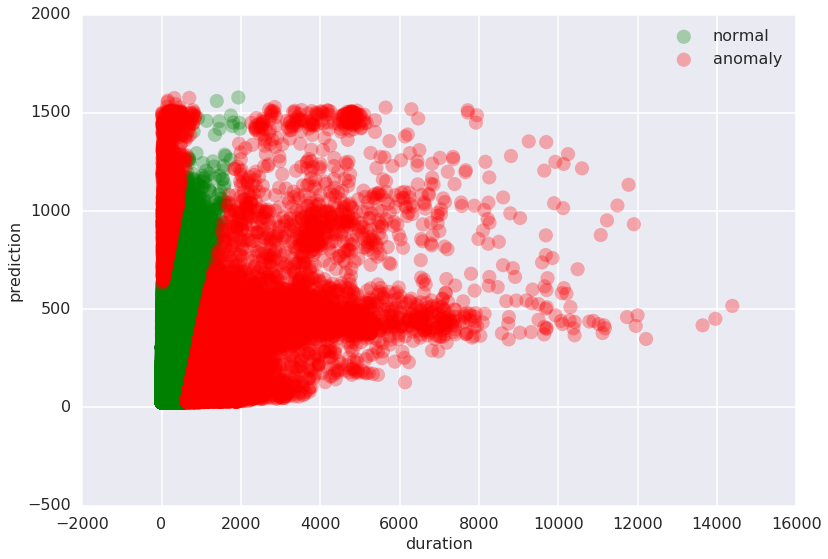

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1, 1,1)
x_norm = []
y_norm = []
x_anom = []
y_anom = []
ax.scatter(normal_data['duration'], normal_data['prediction'],c='green', s=200.0, label='normal', alpha=0.3, edgecolors='none')
ax.scatter(anomalies['duration'], anomalies['prediction'],c='red', s=200.0, label='anomaly', alpha=0.3, edgecolors='none')
# for i in range(len(data['duration'])):
#     if data['label'][i] == 'normal':
#         x_norm.append(data['duration'])
#         y_norm.append(data['prediction'])
#     if data['label'][i] == 'anomaly':
#         x_anom.append(data['duration'])
#         y_anom.append(data['prediction'])

# ax.scatter(x_norm, y_norm, c='green', s=200.0, label='normal', alpha=0.3, edgecolors='none')
# ax.scatter(x_anom, y_anom, c='red', s=200.0, label='anomaly', alpha=0.3, edgecolors='none')
ax.legend()
plt.xlabel('duration', fontsize=16)
plt.ylabel('prediction', fontsize=16)

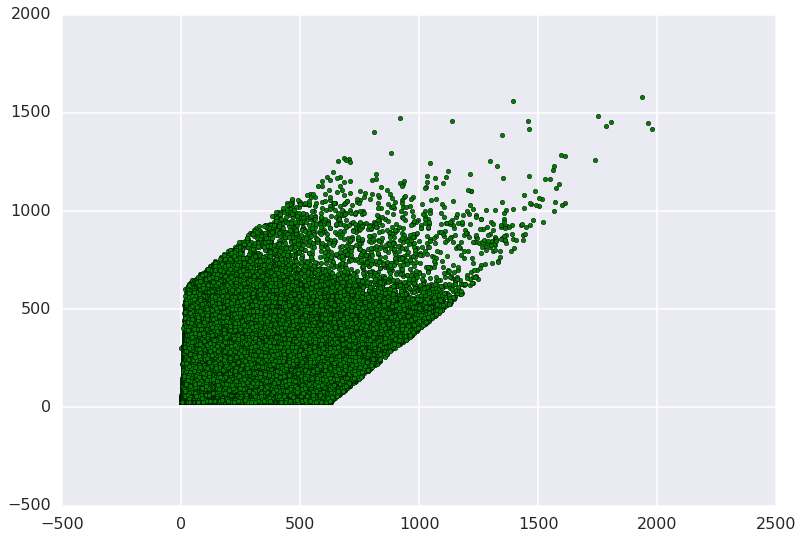

In [23]:
plt.scatter(normal_data['duration'], normal_data['prediction'], c='green')

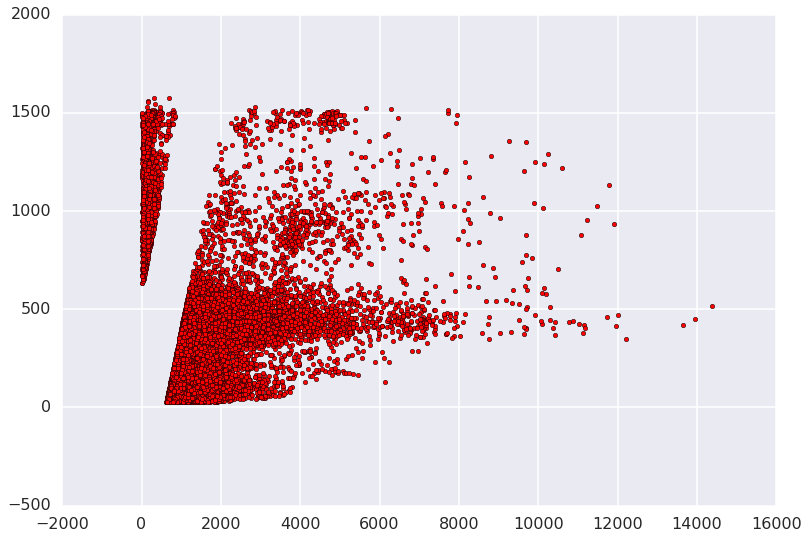

In [22]:
plt.scatter(anomalies['duration'], anomalies['prediction'], c='red')

In [12]:
anomalies.shape

(18206, 15)

In [13]:
normal_data.shape

(941233, 15)

In [22]:
print('% of anomalies from {} events = {:.3f} % ; ({}) '.format(data.shape[0], (anomalies.shape[0]/data.shape[0])*100,anomalies.shape[0]))

% of anomalies from 959439 events = 1.898 % ; (18206) 


In [24]:
anomalies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18206 entries, 247 to 958245
Data columns (total 15 columns):
submitted_at         18206 non-null object
bytes                18206 non-null int64
delay                18206 non-null int64
activity             18206 non-null object
dst-rse              18206 non-null object
dst-type             18206 non-null object
protocol             18206 non-null object
src-rse              18206 non-null object
src-type             18206 non-null object
transfer-endpoint    18206 non-null object
duration             18206 non-null int64
prediction           18206 non-null float64
name                 18206 non-null object
scope                18206 non-null object
label                18206 non-null object
dtypes: float64(1), int64(3), object(11)
memory usage: 2.2+ MB


array([2585, 3047, 1390,  881, 1087, 7107,  651,  577,  737,  142,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    1,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    1])

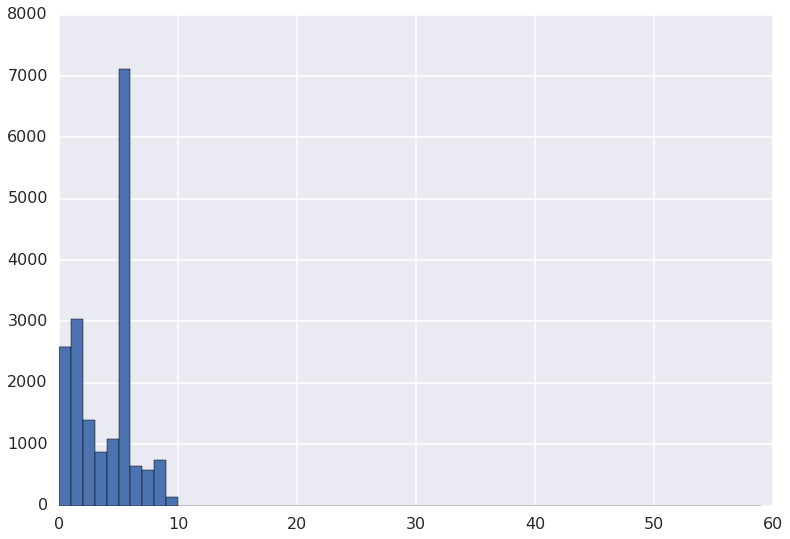

In [39]:
size_gb=anomalies['bytes']/1073741824
# print(size_gb.value_counts())

count, division = np.histogram(size_gb, bins = range(0,60))
size_gb.hist(bins=division)
count

In [14]:
# threshold=5*60

# # data['err'] = data['duration']-data['prediction']

# def f(x):
#     if np.absolute(x)<=300:
#         return 'normal'
#     else:
#         return 'anomaly'

# data['label']= data['err'].apply(lambda x : f(x))

# data.head()